In [1]:
import torch
torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import lr_scheduler
import numpy as np
from numpy import random
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn import metrics
import statistics

In [2]:
from neural_verification import MLP, MLPConfig

In [3]:
N = 10000 # number of samples
n = 2 # number of numbers per sample

In [4]:
X = torch.normal(0,1,size=(N, n))

In [5]:
y = []
for i in range(N):
    y.append([X[i][0]*X[i][1]])

In [6]:
y = torch.tensor(y)

In [7]:
X

tensor([[-1.1258, -1.1524],
        [-0.2506, -0.4339],
        [ 0.8487,  0.6920],
        ...,
        [ 0.3877,  1.0991],
        [ 0.4403,  1.6217],
        [ 2.1894, -0.4871]])

In [8]:
y

tensor([[ 1.2974],
        [ 0.1087],
        [ 0.5873],
        ...,
        [ 0.4261],
        [ 0.7141],
        [-1.0665]])

In [9]:
dataset = TensorDataset(X, y)

In [10]:
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [11]:
loss_fn = nn.MSELoss()

In [12]:
def train(d):
    print(f"Training model with {d} nodes in hidden layer")
    model = MLP(MLPConfig(width=d))
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=250, gamma=0.8)
    num_epochs = 10000
    training_loss = []
    for epoch in range(num_epochs):
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        scheduler.step()
        
        y_pred = model(X)
        epochloss = loss_fn(y_pred, y)
        training_loss.append(epochloss.item())
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Learning Rate: {optimizer.param_groups[0]["lr"]}, Loss: {epochloss}')
    plt.plot(training_loss, label=f'train_loss (d = {d})')
    plt.yscale("log")
    plt.legend(loc='lower left')
    plt.show
    plt.savefig(f'multiply-results/multiply{d}-5.png')
    torch.save(model.state_dict(), f"model{d}.pt")

In [13]:
ds = [10, 15, 25, 50]

Training model with 10 nodes in hidden layer
Epoch [100/10000], Learning Rate: 0.1, Loss: 0.006456615403294563
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.006015562452375889
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.004806334152817726
Epoch [400/10000], Learning Rate: 0.08000000000000002, Loss: 0.003131282050162554
Epoch [500/10000], Learning Rate: 0.06400000000000002, Loss: 0.0019444251665845513
Epoch [600/10000], Learning Rate: 0.06400000000000002, Loss: 0.0016664274735376239
Epoch [700/10000], Learning Rate: 0.06400000000000002, Loss: 0.007425518706440926
Epoch [800/10000], Learning Rate: 0.051200000000000016, Loss: 0.0012765012215822935
Epoch [900/10000], Learning Rate: 0.051200000000000016, Loss: 0.0030190779361873865
Epoch [1000/10000], Learning Rate: 0.04096000000000002, Loss: 0.0042333886958658695
Epoch [1100/10000], Learning Rate: 0.04096000000000002, Loss: 0.0007466765819117427
Epoch [1200/10000], Learning Rate: 0.04096000000000002, Loss: 0.00531314639

Epoch [9700/10000], Learning Rate: 2.0769187434139353e-05, Loss: 5.6394287639705e-07
Epoch [9800/10000], Learning Rate: 1.6615349947311485e-05, Loss: 5.533605076379899e-07
Epoch [9900/10000], Learning Rate: 1.6615349947311485e-05, Loss: 5.311064228408213e-07
Epoch [10000/10000], Learning Rate: 1.3292279957849188e-05, Loss: 5.378798277888563e-07
Training model with 15 nodes in hidden layer
Epoch [100/10000], Learning Rate: 0.1, Loss: 0.006620096042752266
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.003924510441720486
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.004395985975861549
Epoch [400/10000], Learning Rate: 0.08000000000000002, Loss: 0.0012621936621144414
Epoch [500/10000], Learning Rate: 0.06400000000000002, Loss: 0.0033959313295781612
Epoch [600/10000], Learning Rate: 0.06400000000000002, Loss: 0.0023357293102890253
Epoch [700/10000], Learning Rate: 0.06400000000000002, Loss: 0.002321717794984579
Epoch [800/10000], Learning Rate: 0.051200000000000016, Loss: 0

Epoch [9300/10000], Learning Rate: 2.596148429267419e-05, Loss: 2.5006698933793814e-07
Epoch [9400/10000], Learning Rate: 2.596148429267419e-05, Loss: 2.4351609795303375e-07
Epoch [9500/10000], Learning Rate: 2.0769187434139353e-05, Loss: 2.4012229005165864e-07
Epoch [9600/10000], Learning Rate: 2.0769187434139353e-05, Loss: 2.426210699013609e-07
Epoch [9700/10000], Learning Rate: 2.0769187434139353e-05, Loss: 2.4638771378704405e-07
Epoch [9800/10000], Learning Rate: 1.6615349947311485e-05, Loss: 2.364758699968661e-07
Epoch [9900/10000], Learning Rate: 1.6615349947311485e-05, Loss: 2.317840994692233e-07
Epoch [10000/10000], Learning Rate: 1.3292279957849188e-05, Loss: 2.3628173551060172e-07
Training model with 25 nodes in hidden layer
Epoch [100/10000], Learning Rate: 0.1, Loss: 0.009283375926315784
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.010214120149612427
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.008220012299716473
Epoch [400/10000], Learning Rate: 0.08000

Epoch [8900/10000], Learning Rate: 4.056481920730342e-05, Loss: 1.5780689466282638e-07
Epoch [9000/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.575822921040526e-07
Epoch [9100/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.5113764106899907e-07
Epoch [9200/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.5437569800269557e-07
Epoch [9300/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.7081566738852416e-07
Epoch [9400/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.530876545530191e-07
Epoch [9500/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.5084511062468664e-07
Epoch [9600/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.4984144058871607e-07
Epoch [9700/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.5055728397328494e-07
Epoch [9800/10000], Learning Rate: 1.6615349947311485e-05, Loss: 1.476919777587682e-07
Epoch [9900/10000], Learning Rate: 1.6615349947311485e-05, Loss: 1.48592945947712e-07
Epoch [10000/10000], Learning Rate: 1.32

Epoch [8500/10000], Learning Rate: 5.070602400912927e-05, Loss: 2.1082888679302414e-07
Epoch [8600/10000], Learning Rate: 5.070602400912927e-05, Loss: 2.1814496165006858e-07
Epoch [8700/10000], Learning Rate: 5.070602400912927e-05, Loss: 2.204595404009524e-07
Epoch [8800/10000], Learning Rate: 4.056481920730342e-05, Loss: 2.0097955655273836e-07
Epoch [8900/10000], Learning Rate: 4.056481920730342e-05, Loss: 2.0019747637434193e-07
Epoch [9000/10000], Learning Rate: 3.2451855365842736e-05, Loss: 2.132011047706328e-07
Epoch [9100/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.9599220024701935e-07
Epoch [9200/10000], Learning Rate: 3.2451855365842736e-05, Loss: 2.1311804232482245e-07
Epoch [9300/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.8710048266257218e-07
Epoch [9400/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.9503329440340167e-07
Epoch [9500/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.9632842906958103e-07
Epoch [9600/10000], Learning Rate: 2.0769

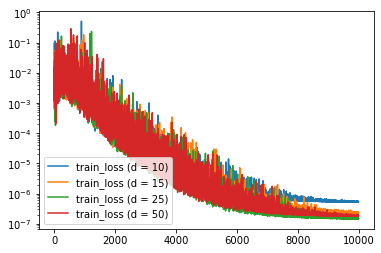

In [14]:
for d in ds:
    train(d)